In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.rc('font', family='Nanum Gothic')

In [9]:
import matplotlib.font_manager as fm
font_list = sorted([f.name for f in fm.fontManager.ttflist])
font_list

['.Aqua Kana',
 '.Keyboard',
 '.New York',
 '.New York',
 '.SF Arabic',
 '.SF Arabic Rounded',
 '.SF Armenian',
 '.SF Armenian Rounded',
 '.SF Camera',
 '.SF Compact',
 '.SF Compact',
 '.SF Compact Rounded',
 '.SF Georgian',
 '.SF Georgian Rounded',
 '.SF Hebrew',
 '.SF Hebrew Rounded',
 '.SF NS Mono',
 '.SF NS Mono',
 '.SF NS Rounded',
 '.SF Soft Numeric',
 '.ThonburiUI',
 'Academy Engraved LET',
 'Al Bayan',
 'Al Nile',
 'Al Tarikh',
 'American Typewriter',
 'Andale Mono',
 'Apple Braille',
 'Apple Braille',
 'Apple Braille',
 'Apple Braille',
 'Apple Braille',
 'Apple Chancery',
 'Apple LiGothic',
 'Apple LiSung',
 'Apple SD Gothic Neo',
 'Apple Symbols',
 'AppleGothic',
 'AppleMyungjo',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial Black',
 'Arial Hebrew',
 'Arial Narrow',
 'Arial Narrow',
 'Arial Narrow',
 'Arial Narrow',
 'Arial Rounded MT Bold',
 'Arial Unicode MS',
 'Arial Unicode MS',
 'Athelas',
 'Avenir',
 'Avenir Next',
 'Avenir Next Condensed',
 'Ayuthaya',
 'BIZ UDGothi

In [26]:
# 데이터 입력
현황데이터 = pd.read_csv('../OIBC_2024_DATA/data/제주전력시장_현황데이터.csv')
현황데이터.head()

,ts,공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
0,1704034800,1298000.0,769000.0,0.0,125426.0,133103.0,529000.0,323000.0
1,1704035100,1299000.0,761000.0,0.0,130393.0,137867.0,538000.0,339000.0
2,1704035400,1290000.0,755000.0,0.0,120691.0,128133.0,534000.0,335000.0
3,1704035700,1277000.0,756000.0,0.0,107771.0,115519.0,521000.0,325000.0
4,1704036000,1269000.0,753000.0,0.0,99264.4,107153.0,515000.0,318000.0


/Users/taewonkim/Develop/Python/OIBC_2024/.venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Nanum Gothic.
  fig.canvas.draw()
/Users/taewonkim/Develop/Python/OIBC_2024/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Nanum Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


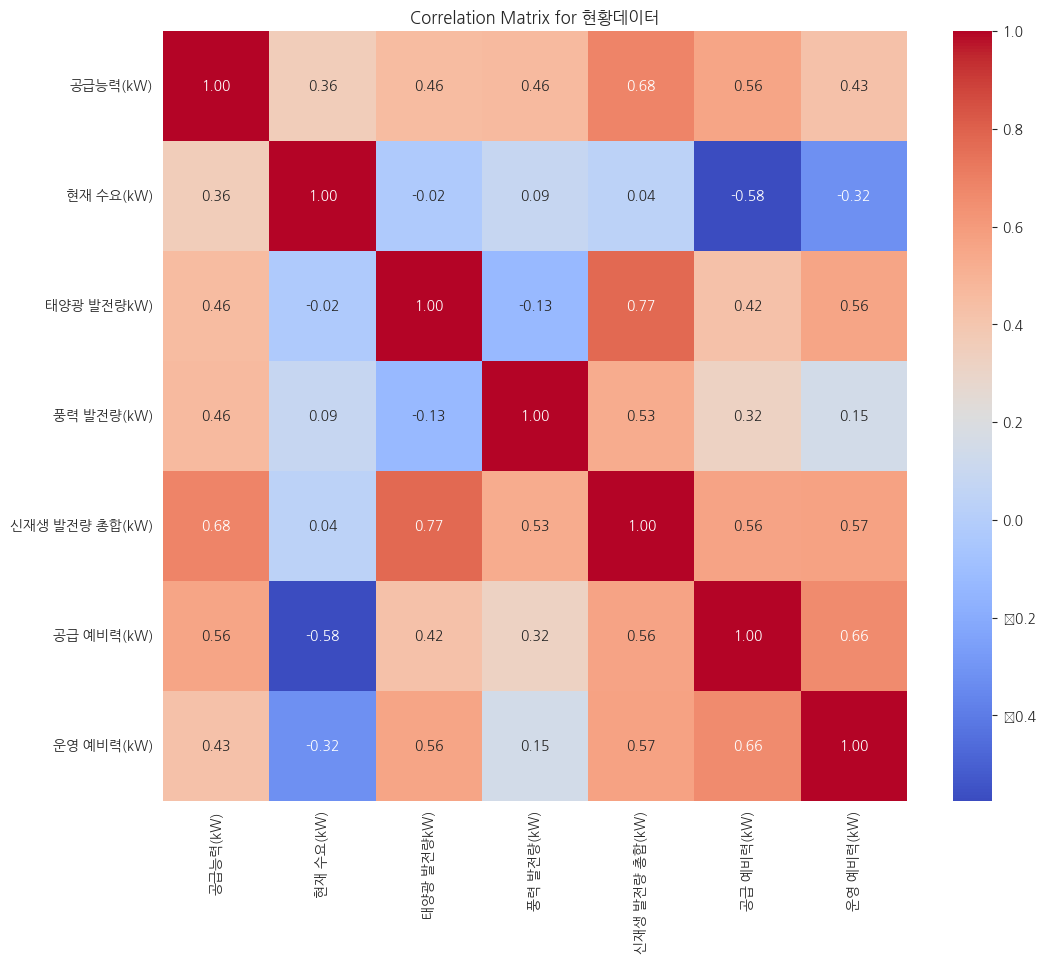

In [32]:
현황데이터_ts제거 = 현황데이터.drop(columns=['ts'])
현황데이터_corr = 현황데이터_ts제거.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(현황데이터_corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix for 현황데이터")
plt.show()

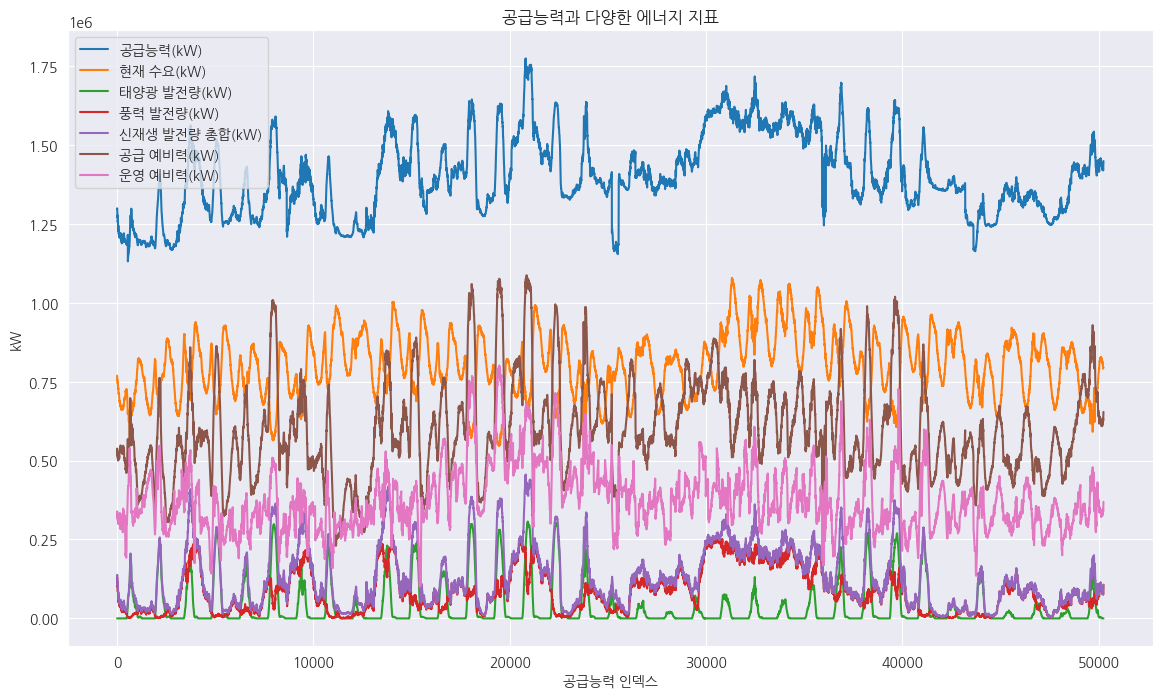

In [22]:
# 공급능력 인덱스 변환 (첫 시점을 0으로 설정하고, 300 증가마다 5씩 증가)
현황데이터['공급능력 인덱스'] = ((현황데이터['ts'] - 현황데이터['ts'][0]) / 300) * 5

# 시각화
plt.figure(figsize=(14, 8))
sns.lineplot(data=현황데이터, x="공급능력 인덱스", y="공급능력(kW)", label="공급능력(kW)")
sns.lineplot(data=현황데이터, x="공급능력 인덱스", y="현재 수요(kW)", label="현재 수요(kW)")
sns.lineplot(data=현황데이터, x="공급능력 인덱스", y="태양광 발전량kW)", label="태양광 발전량(kW)")
sns.lineplot(data=현황데이터, x="공급능력 인덱스", y="풍력 발전량(kW)", label="풍력 발전량(kW)")
sns.lineplot(data=현황데이터, x="공급능력 인덱스", y="신재생 발전량 총합(kW)", label="신재생 발전량 총합(kW)")
sns.lineplot(data=현황데이터, x="공급능력 인덱스", y="공급 예비력(kW)", label="공급 예비력(kW)")
sns.lineplot(data=현황데이터, x="공급능력 인덱스", y="운영 예비력(kW)", label="운영 예비력(kW)")

# 그래프 설정
plt.title("공급능력과 다양한 에너지 지표")
plt.xlabel("공급능력 인덱스")
plt.ylabel("kW")
plt.legend()
plt.show()

In [28]:
기상실측데이터 = pd.read_csv('../OIBC_2024_DATA/data/기상실측데이터_1.csv')
기상실측데이터.head()

,location,ts,temp,real_feel_temp,real_feel_temp_shade,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,pressure,appr_temp,wind_chill_temp,wet_bulb_temp,precip_1h
0,Ilgwa-ri,1709222220,6.9,2.4,2.4,69.0,1.5,338.0,18.7,37.7,0.0,17.7,98.0,579.0,1022.0,8.3,3.3,4.5,0.0
1,Ilgwa-ri,1709222580,7.1,2.7,2.7,68.0,1.5,338.0,18.7,37.7,0.0,17.7,98.0,579.0,1022.0,8.9,3.9,4.6,0.0
2,Ilgwa-ri,1709226120,6.3,0.9,0.9,64.0,-0.1,338.0,22.0,22.0,0.0,16.1,91.0,579.0,1018.6,7.2,2.2,3.5,0.0
3,Ilgwa-ri,1709229420,5.6,-1.7,-1.7,63.0,-0.9,338.0,31.7,31.7,0.0,16.1,45.0,12192.0,1023.0,6.7,0.6,2.9,0.0
4,Ilgwa-ri,1709229840,5.6,-1.7,-1.7,63.0,-0.9,338.0,31.7,31.7,0.0,16.1,45.0,3018.0,1024.0,6.7,0.6,2.9,0.0


/Users/taewonkim/Develop/Python/OIBC_2024/.venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Nanum Gothic.
  fig.canvas.draw()
/Users/taewonkim/Develop/Python/OIBC_2024/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Nanum Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


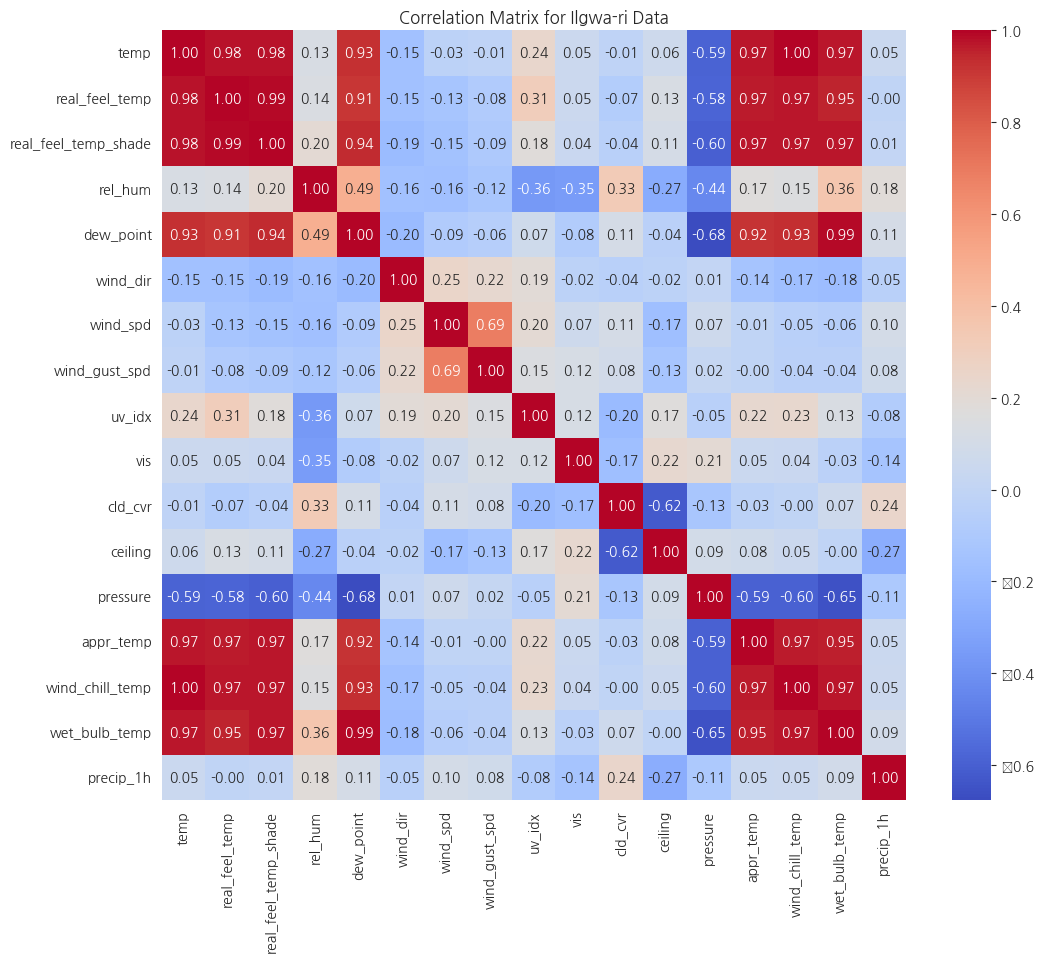

In [30]:
ilgwa_corr = 기상실측데이터[기상실측데이터["location"] == "Ilgwa-ri"].drop(columns=["location", "ts"]).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(ilgwa_corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix for Ilgwa-ri Data")
plt.show()